In [1]:
from modules.helper import *
import modules.lyapunov as lyp
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

tolerence = 1e-1
imagefolder = 'images/'

import modules.main as main
import time

start = time.time()
l1,l2 = main.main(amin = 0.7, amax = 2, lmin = 0.1, lmax = 1, da = 0.01, dl =0.01, ablocks = 10, lblocks = 10, n_transient = 1e6, n_attractor = 1e4)
print(f'Total run time:\t{time.time()-start:.2f}')

Iterating over the transient of 1000000 steps
    Done in 109.90 s
Iterating over the attractor of 10000 steps
    Done in 2.81 s
Generating initial conditions
    Done in 0.00 s
Calculating the Jacobian Matrix for each point


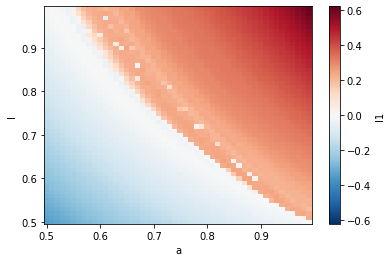

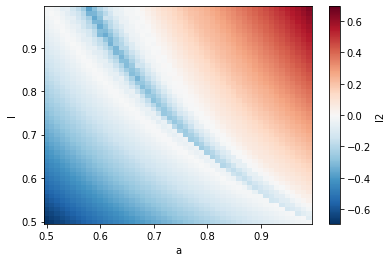

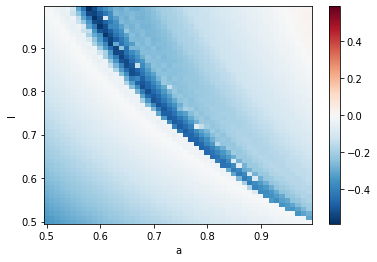

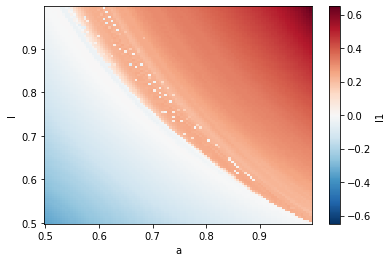

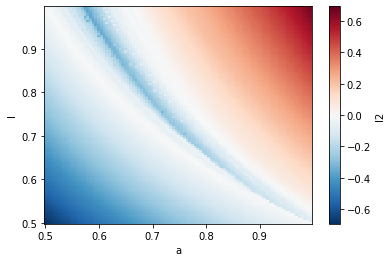

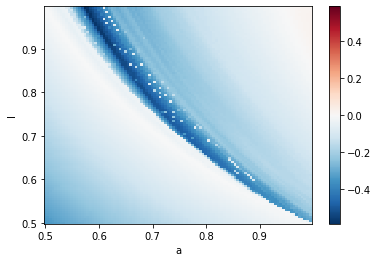

In [4]:
l1 = xr.open_dataset('data/lyapunov1_small_6_4_highres.nc').__xarray_dataarray_variable__
l2 = xr.open_dataset('data/lyapunov2_small_6_4_highres.nc').__xarray_dataarray_variable__
imagefolder = 'images/'
l1.name = 'l1'
l2.name = 'l2'
plt.figure()
plt.title('Mean first Lyapunov Exponent')
l1.mean(axis=(0,1)).plot()
plt.savefig(imagefolder + 'Mean_lyapunov1.pdf')
plt.show()

plt.figure()
l2.mean(axis=(0,1)).plot()
plt.savefig(imagefolder + 'Mean_lyapunov_sum_12.pdf')
plt.show()

plt.figure()
(l2-l1).mean(axis=(0,1)).plot()
plt.show()

l1 = xr.open_dataset('data/lyapunov1_small_4_4_highres.nc').__xarray_dataarray_variable__
l2 = xr.open_dataset('data/lyapunov2_small_4_4_highres.nc').__xarray_dataarray_variable__
imagefolder = 'images/'
l1.name = 'l1'
l2.name = 'l2'
plt.figure()
plt.title('Mean first Lyapunov Exponent')
l1.mean(axis=(0,1)).plot()
plt.savefig(imagefolder + 'Mean_lyapunov1.pdf')
plt.show()

plt.figure()
l2.mean(axis=(0,1)).plot()
plt.savefig(imagefolder + 'Mean_lyapunov_sum_12.pdf')
plt.show()

plt.figure()
(l2-l1).mean(axis=(0,1)).plot()
plt.show()

In [ ]:
l1.to_netcdf('data/lyapunov1_large_6_4_highres.nc')
l2.to_netcdf('data/lyapunov2_large_6_4_highres.nc')

In [2]:
l1 = xr.open_dataset('data/lyapunov1_large_6_4_highres.nc').__xarray_dataarray_variable__
l2 = xr.open_dataset('data/lyapunov2_large_6_4_highres.nc').__xarray_dataarray_variable__
l1, l2

(<xarray.DataArray '__xarray_dataarray_variable__' (x: 10, y: 10, l: 90, a: 130)>
 [1170000 values with dtype=float64]
 Coordinates:
   * x        (x) float64 -10.0 -7.778 -5.556 -3.333 ... 3.333 5.556 7.778 10.0
   * y        (y) float64 -10.0 -7.778 -5.556 -3.333 ... 3.333 5.556 7.778 10.0
   * l        (l) float64 0.1 0.11 0.12 0.13 0.14 ... 0.95 0.96 0.97 0.98 0.99
   * a        (a) float64 0.7 0.71 0.72 0.73 0.74 ... 1.95 1.96 1.97 1.98 1.99,
 <xarray.DataArray '__xarray_dataarray_variable__' (x: 10, y: 10, l: 90, a: 130)>
 [1170000 values with dtype=float64]
 Coordinates:
   * x        (x) float64 -10.0 -7.778 -5.556 -3.333 ... 3.333 5.556 7.778 10.0
   * y        (y) float64 -10.0 -7.778 -5.556 -3.333 ... 3.333 5.556 7.778 10.0
   * l        (l) float64 0.1 0.11 0.12 0.13 0.14 ... 0.95 0.96 0.97 0.98 0.99
   * a        (a) float64 0.7 0.71 0.72 0.73 0.74 ... 1.95 1.96 1.97 1.98 1.99)

In [ ]:
stacked1 = l1.stack(z=('x','y','l','a'))
stacked2 = l2.stack(z=('x','y','l','a'))
stacked1 = stacked1.to_pandas()
stacked1 = stacked1.reset_index()
stacked1.columns = ['x_0', 'y_0', 'lambda', 'a', 'lyapunov1']
stacked1['lyapunov_sum_12'] = stacked2.values
stacked1.to_csv('data/full_data.dat', index = False)